<a href="https://colab.research.google.com/github/limph0nimph/Analysis-of-SGD-of-Deep-Neural-Networks-Under-Heavy-Tailed-Gradient-Noise/blob/main/02-classes/DS23_ICEF_class2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class 2 Today we continue exploring pandas and matplotlib libraries




# Let us recall data loading process
Usually tabular data is stored in files. Such data sets are commonly called datasets. Files with a dataset can have a different format. Pandas supports read and write operations for CSV, Excel 2007+, SQL, HTML, JSON, etc.

A few examples of how to get a dataset from files of different formats:



*   **CSV** The read_csv() function is used. The file argument is a string containing the path to the dataset file. To write data from the Data Frame to a CSV file, the to_csv(file) method is used.

*  **Excel** The read_excel() function is used. To write data from the Data Frame to an Excel file, the to_excel().

*  **JSON** method is used. The read_json() function is used. To write data from the Data Frame to JSON, the to_json() method is used.

How to download data from github page to colab using magic command from linux paradigm.

```
!wget -c https://raw.githubusercontent.com/Shuaynat/DSE-23-24/main/01-classes/flats_moscow.csv
```



---



In [ ]:
!wget https://raw.githubusercontent.com/Shuaynat/DSE-23-24/main/01-classes/flats_moscow.csv
!wget https://raw.githubusercontent.com/Shuaynat/DSE-23-24/main/02-classes/googleplaystore.csv
!wget https://raw.githubusercontent.com/Shuaynat/DSE-23-24/main/02-classes/googleplaystore_user_reviews.csv


--2023-09-08 16:13:53--  https://raw.githubusercontent.com/Shuaynat/DSE-23-24/main/01-classes/flats_moscow.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66976 (65K) [text/plain]
Saving to: ‘flats_moscow.csv.1’

flats_moscow.csv.1  100%[===================>]  65.41K  --.-KB/s    in 0.001s  

2023-09-08 16:13:53 (56.1 MB/s) - ‘flats_moscow.csv.1’ saved [66976/66976]

--2023-09-08 16:13:53--  https://raw.githubusercontent.com/Shuaynat/DSE-23-24/main/02-classes/googleplaystore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 

Let us know where in google colab we are situated

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
!ls

flats_moscow.csv  sample_data


In [ ]:
import pandas as pd
df = pd.read_csv("flats_moscow.csv")

In [ ]:
df.index

RangeIndex(start=0, stop=2040, step=1)

In [ ]:
df.head()

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


In [ ]:
df.loc[0,"price"]

81

In [ ]:
df.iloc[0,"price"]

ValueError: ignored

In [ ]:
df.iloc[0,1]

81

In [ ]:
df.columns[0]

'Unnamed: 0'

Rename column

In [ ]:
df.rename(columns = {"Unnamed: 0":"index_1"},inplace=True)

Now use same command with local index df.loc[0,"price"]
gives us an error, because now local label index is set on column "index_1", where it starts numerating from 1.

In [ ]:
df.set_index("index_1",inplace = True, drop=False)

In [ ]:
df.columns

Index(['index_1', 'price', 'totsp', 'livesp', 'kitsp', 'dist', 'metrdist',
       'walk', 'brick', 'floor', 'code'],
      dtype='object')

In [ ]:
df.iloc[0,1]

81

In [ ]:
df.loc[0,"price"]

KeyError: ignored

In [ ]:
df.loc[1,"price"]

81

In [ ]:
df.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040],
           dtype='int64', name='index_1', length=2040)

Reset the index of the DataFrame, and use the default one instead.
If the DataFrame has a MultiIndex, this method can remove one or more
levels.
Parameters

level : int, str, tuple, or list, default None
    Only remove the given levels from the index. Removes all levels by default.
drop : bool, default False
    Do not try to insert index into dataframe columns. This resets the index to the default integer index.
inplace : bool, default False
    Whether to modify the DataFrame rather than creating a new one.

In [ ]:
df.reset_index(level = None, inplace =True,)

ValueError: ignored

Let us undersatnd the difference between **.iloc and .loc** indexing:

The function **.loc** is typically used for **label indexing** and can access multiple columns, while **.iloc** is used for **integer indexing**

Label indexing is that we can set index manually:

# Pecularities of Copy of columns and writing into variable
(Записываем в переменную)

In [ ]:
y = df['price']

Change in y generates change in df, as y is linked to dataset.

In [ ]:
y[1]=3

In [ ]:
df.loc[1,"price"]

3

# Dataset changed :((
  Why? y is a link to dataset, if we change y wee change y

Now what if we change dataset what happens to y?


In [ ]:
df.loc[3,"price"]

128

In [ ]:
df.loc[3,"price"] = 4
print(df.loc[3,"price"])

4


But if we change dataset **df** ,then **y** does not changes

In [ ]:
print(y[3])

128


Let us reload dataset

In [ ]:
df = pd.read_csv("flats_moscow.csv")

In [ ]:
y_copy = df['price'].copy()

In [ ]:
print(y_copy)

0        81
1        75
2       128
3        95
4       330
       ... 
2035    110
2036     95
2037     95
2038    129
2039    103
Name: price, Length: 2040, dtype: int64


Let us repeat the experiment: with y_copy

In [ ]:
print("before change, y_copy[1]", y_copy[1])
y_copy[1]=2
print("after  change  of y_copy[1]",y_copy[1])
print("after  change  of y_copy[1], df changes ",df.loc[1,"price"])

before change, y_copy[1] 2
after  change  of y_copy[1] 2
after  change  of y_copy[1], df changes  75


Now chage df what happens to y?

In [ ]:
print("before change, df.loc[3,'price'] ", df.loc[3,'price'])
df.loc[3,'price'] = 4
print("after  change  of df.loc[3,'price'] ",df.loc[3,'price'])
print("after  change  of df.loc[3,'price'], y_copy[3] ",y_copy[3])


before change, df.loc[3,'price']  95
after  change  of df.loc[3,'price']  4
after  change  of df.loc[3,'price'], y_copy[3]  95


## So, copy is a save method if we want to avoid any change!

Use
```
y_copy = df['price'].copy()
```

# Groupby
from the documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

By “group by” we are referring to a process involving one or more of the following steps:

    - Splitting the data into groups based on some criteria.
    - Applying a function to each group independently.
    - Combining the results into a data structure.
    
---
`.groupby()` is one of the most powerfull tool for feature engineering. Very often it is used to group object with the same categorical characteristics and compute some statistics (e.g. mean, max, etc.) of a their numerical characteric.

Instead of computing average area of houses with high grade you could compute average areas of the
houses for every grade in a single command:

```
data.groupby('grade')['sqm_tot_area'].mean()
```

You could also make multi-column groups:

```
data.groupby(['weekday','grade'])['price'].min()
```
next, you could compute multiple aggregation functions:
```
data.groupby(['weekday','grade'])['price'].agg([min, max])
```

instead of using built-in functions you could compute custom functions using apply:
```
import numpy as np
data.groupby(['condition','grade'])['bathrooms'].apply(lambda x: np.quantile(x, .5))
```

and the coolest thing now is that you can map the results of groupby back on your DataFrame!
```
gp = data.groupby(['condition'])['bathrooms'].median()
data['gp_feature'] = data['condition'].map(gp)
```
Now, if some house has `condition == 2`, its `gp_feature` will be equal to the median number of
bathrooms amongst all houses with `condition == 2`.

Read more examples in the documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

In [ ]:
df.groupby("code").mean()

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor
code,,,,,,,,,,
1,1016.525735,134.411765,72.687500,46.316176,9.084559,10.808824,8.628676,0.750000,0.338235,0.838235
2,1101.613953,110.316279,68.018605,43.465116,8.079070,13.753488,7.939535,0.804651,0.134884,0.739535
3,1005.631884,148.246377,76.950725,48.930435,9.272464,11.317391,8.382609,0.547826,0.510145,0.791304
4,1002.148325,148.693780,74.712919,47.449761,9.253589,9.344498,6.822967,0.708134,0.330144,0.856459
5,1004.651786,115.779762,75.696429,45.684524,9.781250,11.748512,7.886905,0.752976,0.136905,0.818452
6,1056.420233,109.964981,70.466926,45.322957,8.334630,11.198444,7.949416,0.642023,0.249027,0.774319
7,1004.849558,114.230088,70.650442,45.070796,8.185841,10.090708,9.132743,0.561947,0.327434,0.747788
8,977.372222,136.744444,72.350000,47.794444,8.519444,8.952778,7.944444,0.777778,0.605556,0.727778


In [ ]:
df.groupby(["code","walk"]).mean()

index_1       price      totsp     livesp     kitsp       dist  \
code walk                                                                       
1    0      958.764706  112.250000  68.867647  44.176471  8.338235  12.750000   
     1     1035.779412  141.799020  73.960784  47.029412  9.333333  10.161765   
2    0     1083.357143  104.404762  68.833333  43.309524  8.190476  14.821429   
     1     1106.046243  111.751445  67.820809  43.502890  8.052023  13.494220   
3    0     1034.339744  120.794872  74.660256  46.891026  9.288462  12.583333   
     1      981.936508  170.904762  78.841270  50.613757  9.259259  10.272487   
4    0      970.754098  154.196721  77.344262  47.803279  9.721311   8.114754   
     1     1015.087838  146.425676  73.628378  47.304054  9.060811   9.851351   
5    0     1037.457831  105.024096  73.951807  44.373494  9.795181  12.448193   
     1      993.889328  119.308300  76.268775  46.114625  9.776680  11.518972   
6    0     1107.608696  109.445652  73.521739  46.369565  8.782609  12.032609   
     1     1027.878788  110.254545  68.763636  44.739394  8.084848  10.733333   
7    0     1054.050505  106.646465  71.959596  44.818182  8.474747  11.681818   
     1      966.496063  120.141732  69.629921  45.267717  7.960630   8.850394   
8    0      905.850000  116.200000  67.800000  45.275000  7.875000   9.425000   
     1      997.807143  142.614286  73.650000  48.514286  8.703571   8.817857   

           metrdist     brick     floor  
code walk                                
1    0     8.911765  0.205882  0.882353  
     1     8.534314  0.382353  0.823529  
2    0     7.761905  0.190476  0.690476  
     1     7.982659  0.121387  0.751445  
3    0     8.641026  0.339744  0.788462  
     1     8.169312  0.650794  0.793651  
4    0     7.016393  0.163934  0.885246  
     1     6.743243  0.398649  0.844595  
5    0     7.108434  0.096386  0.819277  
     1     8.142292  0.150198  0.818182  
6    0     8.586957  0.206522  0.804348  
     1     7.593939  0.272727  0.757576  
7    0     9.888889  0.111111  0.757576  
     1     8.543307  0.496063  0.740157  
8    0     7.075000  0.400000  0.800000  
     1     8.192857  0.664286  0.707143

# Exercise:
##1.2 Plot violin plot for disrtribution of "metrdist" grouped by code.


 ## 1.3 Find indexes of a flat with price 120?


Now let us usee Toy example on merge!

What to do with Nan values?


New Dataset and exercises

In [ ]:
import pandas as pd
apps = pd.read_csv('googleplaystore.csv')
reviews = pd.read_csv('googleplaystore_user_reviews.csv')

Dataset on apps with description

In [ ]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


This is dataset on reviews for apps

In [ ]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# Exercises on this dataset


1.   Print the name of the app with lowest Rating
2.   Print the name of the app with maximum Rating



In [ ]:
#your code here

3. Print average rating of Free and Paid apps

Hint: use groupby by variable Type

In [ ]:
#your code here

4. Print average rating grouped by Installs variable

In [ ]:
#your code here

5.  Find and Print most reviewed category(max number of Reviews)


In [ ]:
#your code here

6. Print an app with highest rating that belongs to  most reviewed category

In [ ]:
#your code here

## Now let us learn how to merge datasets:

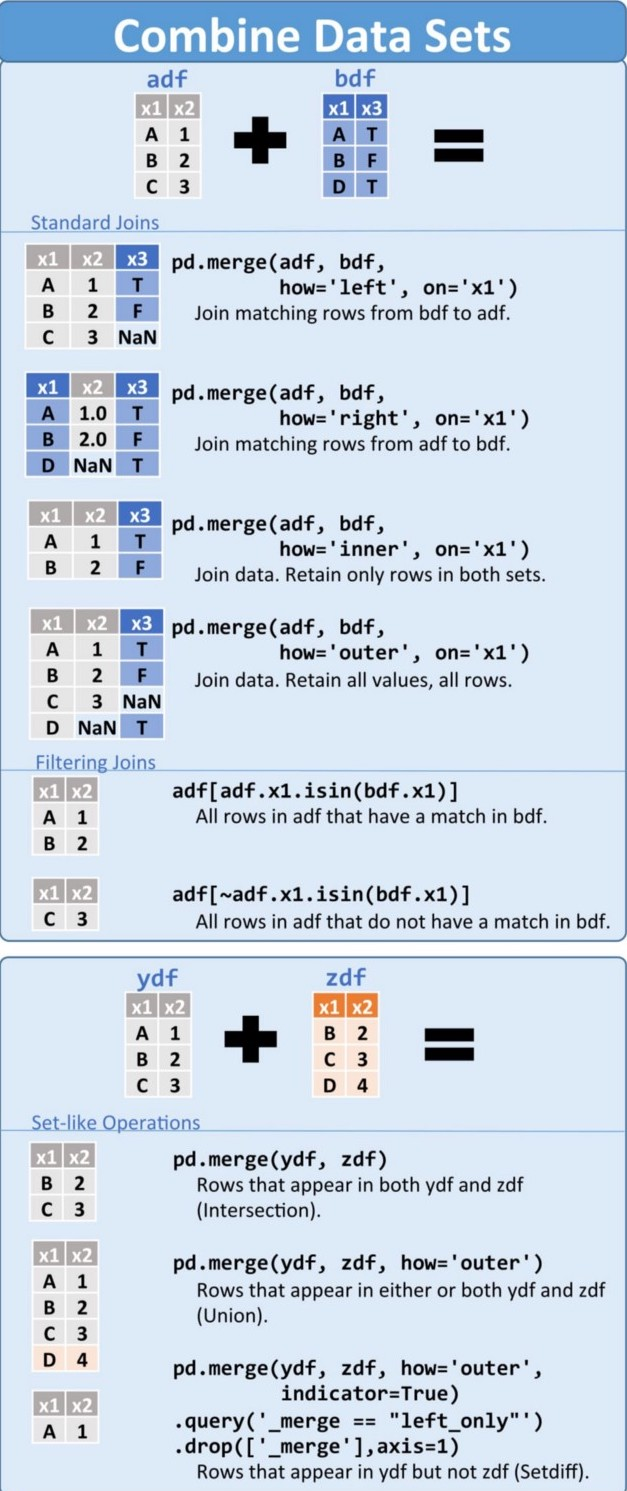

In [ ]:
merged_table = reviews.merge(apps, on="App", how="inner")
merged_table.head(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


We can use also sortings here to print category with reviews with highest Sentiment_Subjectivity

In [ ]:
(
    merged_table[["Category", "Sentiment_Subjectivity"]]
    .groupby("Category")
    .mean()
    .sort_values("Sentiment_Subjectivity", ascending=False)
    .head(1)
)

,Sentiment_Subjectivity
Category,
COMICS,0.579079


# Last exersice:
Print category with reviews with lowest  Sentiment_Polarity

## Exercises for profi


1.   Transform number of Installs into number
2.   Print appp with highest rating in the category with largest number of installs

